In [8]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from functions import PCA
from functions import kernelPCA

%matplotlib inline

# Iris dataset

In [9]:
# load the Iris flower dataset
raw = load_iris()
data = raw.data
label = raw.target

In [10]:
# define colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#7FFFD4', '#9ACD32', '#FFA500']

## PCA

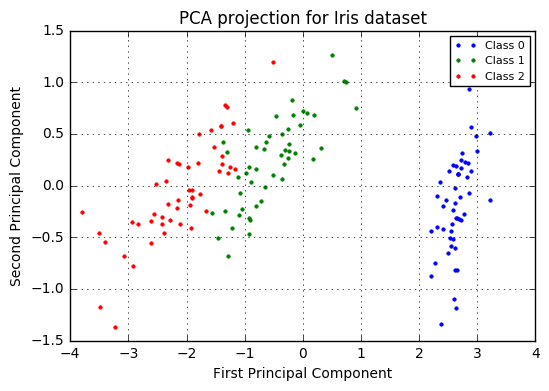

In [4]:
# compute eigenvalues and eigenvectors
eigvals, eigvecs, projection = PCA(data)

# visualize the projections
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('PCA projection for Iris dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
ax.grid('on')
fig.savefig('./result/iris_pca.png', dpi=300)
plt.show()

## Kernel PCA

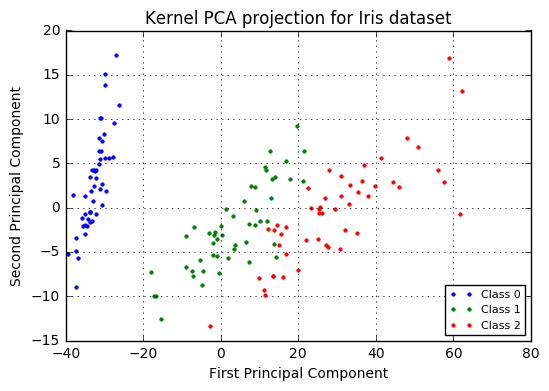

In [5]:
# 2 degree polynomial kernel
eigvals, eigvecs, projection = kernelPCA(data, kernel='polynomial', degree=2, gamma=1)

# visualize the result
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('Kernel PCA projection for Iris dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
ax.grid('on')
fig.savefig('./result/iris_kpca_poly2.png', dpi=300)
plt.show()

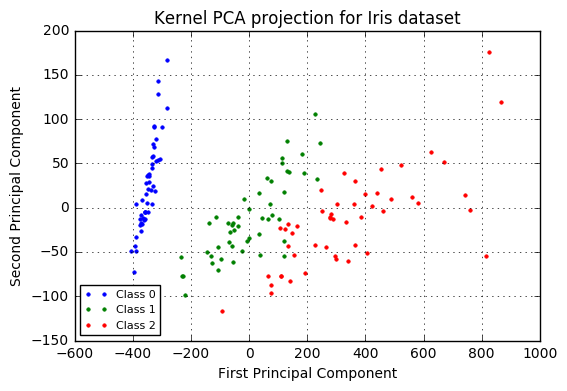

In [6]:
# 3 degree polynomial kernel
eigvals, eigvecs, projection = kernelPCA(data, kernel='polynomial', degree=3, gamma=1)

# visualize the result
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('Kernel PCA projection for Iris dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
ax.grid('on')
fig.savefig('./result/iris_kpca_poly3.png', dpi=300)
plt.show()

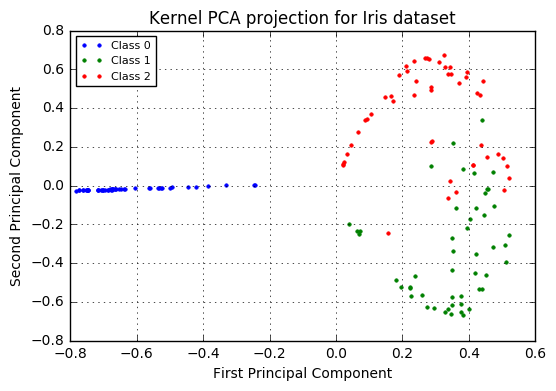

In [7]:
# rbf kernel
eigvals, eigvecs, projection = kernelPCA(data, kernel='rbf', gamma=1)

# visualize the result
fig, ax = plt.subplots()
for i in range(3):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.set_title('Kernel PCA projection for Iris dataset')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend(fontsize=8, loc='best')
ax.grid('on')
fig.savefig('./result/iris_kpca_rbf.png', dpi=300)
plt.show()